# FIFA 22 PLAYER RATINGS ANALYSIS

### Comparing player ratings over the years and analysing growth and decline

In [1]:
#importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

In [2]:
#loading the dataset of fifa 22 male players

address_22='D:/Data Analysis/DataSets/players_22.csv'
df_22=pd.read_csv(address_22)
df_22.head(5)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [3]:
df_22.isna().sum().sort_values(ascending=False)[:20]

nation_jersey_number         18480
nation_logo_url              18480
nation_position              18480
nation_team_id               18480
club_loaned_from             18137
player_tags                  17798
goalkeeping_speed            17107
player_traits                 9841
dribbling                     2132
shooting                      2132
passing                       2132
physic                        2132
defending                     2132
pace                          2132
release_clause_eur            1176
club_joined                   1163
value_eur                       74
club_contract_valid_until       61
league_level                    61
club_jersey_number              61
dtype: int64

Look's like 61 players will be free agents as they have no valid contracts next season. 

In [4]:
#slicing the required columns
df_22.loc[:,'short_name':'gk']

,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,1987-06-24,170,...,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3,19+3
1,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,1988-08-21,185,...,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3,19+3
2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,1985-02-05,187,...,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3,20+3
3,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,1992-02-05,175,...,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3,20+3
4,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,1991-06-28,181,...,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3,21+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,1999-01-02,180,...,46+2,46+2,46+2,48+2,48+2,46+2,46+2,46+2,48+2,15+2
19235,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,2002-03-18,175,...,46+2,46+2,46+2,49+2,48+2,44+2,44+2,44+2,48+2,14+2
19236,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,2000-02-07,178,...,46+2,46+2,46+2,47+2,47+2,45+2,45+2,45+2,47+2,12+2
19237,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,2002-04-23,173,...,29+2,29+2,29+2,33+2,32+2,26+2,26+2,26+2,32+2,15+2


In [5]:
df_22[['short_name','player_positions']]

,short_name,player_positions
0,L. Messi,"RW, ST, CF"
1,R. Lewandowski,ST
2,Cristiano Ronaldo,"ST, LW"
3,Neymar Jr,"LW, CAM"
4,K. De Bruyne,"CM, CAM"
...,...,...
19234,Song Defu,CDM
19235,C. Porter,CM
19236,N. Logue,CM
19237,L. Rudden,ST


<h3>We will be facing difficulties with players having multiple positions</h3>
Luckily sofifa database has now updated and added anothe column known as the best position. So we will be importing that for the fifa 22 ratings

In [6]:
df_fifa_22=pd.read_csv('D:/Data Analysis/DataSets/players_fifa22.csv')
df_fifa_22.head()

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,...,93,90,93,69,67,69,64,53,64,22
1,188545,R. Lewandowski,Robert Lewandowski,32,185,81,https://cdn.sofifa.com/players/188/545/22_60.png,Poland,92,92,...,87,83,87,67,69,67,64,63,64,22
2,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,36,187,83,https://cdn.sofifa.com/players/020/801/22_60.png,Portugal,91,91,...,89,81,89,66,62,66,63,56,63,23
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
4,200389,J. Oblak,Jan Oblak,28,188,87,https://cdn.sofifa.com/players/200/389/22_60.png,Slovenia,91,93,...,38,41,38,35,39,35,35,36,35,92


As we can see this is a much comprehensive dataset with necessary columns

In [7]:
df_fifa_22.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

In [8]:
df_fifa_22.iloc[0:11, [1,8,14,15,7]]

,Name,Overall,BestPosition,Club,Nationality
0,L. Messi,93,RW,Paris Saint-Germain,Argentina
1,R. Lewandowski,92,ST,FC Bayern München,Poland
2,Cristiano Ronaldo,91,ST,Manchester United,Portugal
3,K. Mbappé,91,ST,Paris Saint-Germain,France
4,J. Oblak,91,GK,Atlético de Madrid,Slovenia
5,K. De Bruyne,91,CM,Manchester City,Belgium
6,Neymar Jr,91,LW,Paris Saint-Germain,Brazil
7,N. Kanté,90,CDM,Chelsea,France
8,H. Kane,90,ST,Tottenham Hotspur,England
9,M. ter Stegen,90,GK,FC Barcelona,Germany


<h3>Here is the list of the top 10 players in FIFA 22 with their respective ratings and positions</h3>

In [9]:
df_fifa_22['Nationality'].value_counts()

England      1718
Germany      1214
Spain        1091
France        987
Argentina     955
             ... 
Tanzania        1
Fiji            1
Bermuda         1
Malawi          1
Indonesia       1
Name: Nationality, Length: 163, dtype: int64

As we can see the 5 countries with most of the players are England,Germany,Spain,France and Argentina we will take a deeper insight about their ratings. Let's create a new dataframe for these countries exclusively. Also let's add Italy and Brazil for their success at the World Cup.

In [10]:
country=['England','Germany','Spain','France','Argentina','Brazil','Italy']
df_country=df_fifa_22[df_fifa_22['Nationality'].isin(country)] 

df_country.head()    

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
0,158023,L. Messi,Lionel Messi,34,170,72,https://cdn.sofifa.com/players/158/023/22_60.png,Argentina,93,93,...,93,90,93,69,67,69,64,53,64,22
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
6,190871,Neymar Jr,Neymar da Silva Santos Jr.,29,175,68,https://cdn.sofifa.com/players/190/871/22_60.png,Brazil,91,91,...,91,85,91,70,66,70,65,53,65,23
7,215914,N. Kanté,N'Golo Kanté,30,168,70,https://cdn.sofifa.com/players/215/914/22_60.png,France,90,90,...,82,85,82,88,90,88,88,87,88,23
8,202126,H. Kane,Harry Kane,27,188,89,https://cdn.sofifa.com/players/202/126/22_60.png,England,90,90,...,87,85,87,70,71,70,67,64,67,23


Let's have a look at the average overall rating of these countries individually to see if we can infer which country has the best footballers atleast according to FIFA Ea Sports.

In [11]:
#preparing the mean
barplot = df_country.groupby(['Nationality'],as_index=False).mean()[['Nationality','Overall']]
barplot

,Nationality,Overall
0,Argentina,68.696335
1,Brazil,70.848850
2,England,63.958091
3,France,67.573455
4,Germany,65.656507
5,Italy,69.970501
6,Spain,69.574702


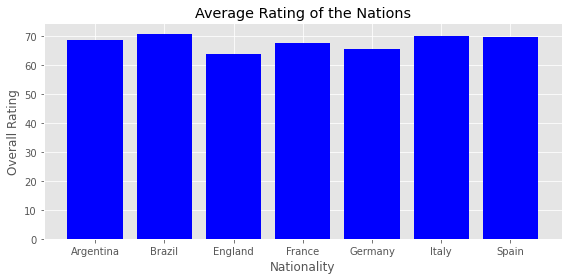

In [12]:
#visualizing the data in bar chart
plt.figure(figsize=(8,4), tight_layout=True)

plt.bar(barplot['Nationality'],barplot['Overall'],color="blue")
plt.xlabel('Nationality')
plt.ylabel('Overall Rating')
plt.title('Average Rating of the Nations')
plt.show()

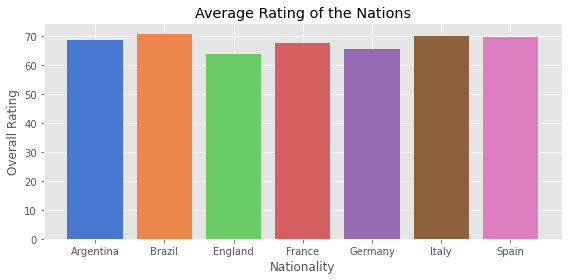

In [13]:
#it's a bit difficult with the same colors, so let's add different colors to the countries.
plt.figure(figsize=(8,4), tight_layout=True)
colors = sns.color_palette('muted')

plt.bar(barplot['Nationality'],barplot['Overall'],color=colors[:7])
plt.xlabel('Nationality')
plt.ylabel('Overall Rating')
plt.title('Average Rating of the Nations')
plt.show()

<h4> On first glance it seems like Brazil has the best mean player ratings and England has the lowest. However this doesn't prove the best players are from Brazil always. It may be because the number of players from England are a lot more than the other countries which we saw previously</h4>
So let's try to compare the ratings of the top 50 players from each nation and check out what that says.

In [14]:
#pocessing the top 50 players

top_50 = pd.concat(
[df_country[df_country['Nationality']=='Argentina'][:50],
 df_country[df_country['Nationality']=='Brazil'][:50],
 df_country[df_country['Nationality']=='England'][:50],
 df_country[df_country['Nationality']=='France'][:50],
 df_country[df_country['Nationality']=='Germany'][:50],
 df_country[df_country['Nationality']=='Italy'][:50],
 df_country[df_country['Nationality']=='Spain'][:50]]
)
barplot = top_50.groupby(['Nationality'],as_index=False).mean()[['Nationality','Overall']]
barplot

,Nationality,Overall
0,Argentina,80.70
1,Brazil,82.46
2,England,81.56
3,France,82.30
4,Germany,81.90
5,Italy,80.94
6,Spain,83.22


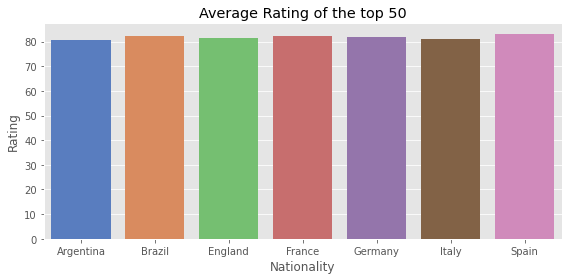

In [15]:
plt.figure(figsize=(8,4), tight_layout=True)
ax = sns.barplot(x=barplot['Nationality'], y=barplot['Overall'], palette='muted', ci=None)
ax.set(title='Average Rating of the top 50', xlabel='Nationality', ylabel='Rating')
plt.show()

As we can see there's not much difference in the average ratings of the top 50 players of these countries. Spain sligthly edging over the others and Argentina lagging behind even though they have one of the highest rated players Messi.

<h4> Now let's visualize the spread of the overall ratings of the players with histograms and box plots to check out some outliers if possible.</h4>

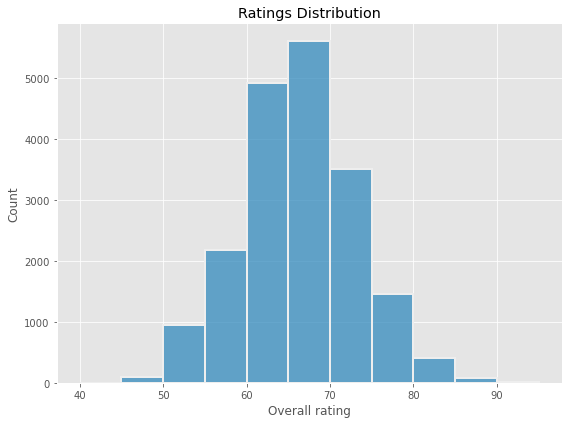

In [16]:
plt.figure(figsize=(8,6), tight_layout=True)
bins = [40,45,50,55,60,65,70,75,80,85,90,95]
ax = sns.histplot(data = df_fifa_22, x= 'Overall', bins=bins, linewidth=2)
ax.set(title='Ratings Distribution', xlabel='Overall rating', ylabel='Count')

plt.show()

It is evident that most of the players are within the 60-70 range and the number of players with greater than 80 rating is very low. Seems to be a normal distribution of the ratings slightly skewed. It takes a lot to reach the highest ratings and become the best players, that's for sure.

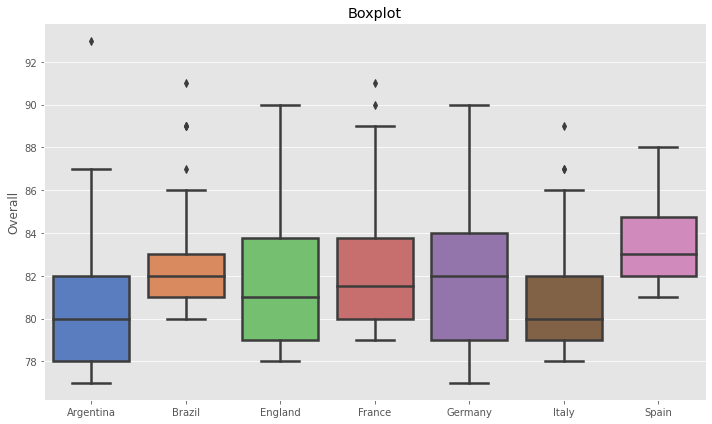

In [17]:
plt.figure(figsize=(10,6), tight_layout=True)
ax = sns.boxplot(data=top_50, x='Nationality', y='Overall', palette='muted', linewidth=2.5)
ax.set(title='Boxplot', xlabel='', ylabel='Overall')
plt.show()

It's evident that Spain has a better average rating group than the other countries we selected. However we need to note that Brazil, England and Italy have certain individuals who are much better than their own teammates. Argentina of course has that one player possibly the greatest of all times.

In [18]:
df_fifa_22.iloc[0:10, [1,8,14,15,7]]

,Name,Overall,BestPosition,Club,Nationality
0,L. Messi,93,RW,Paris Saint-Germain,Argentina
1,R. Lewandowski,92,ST,FC Bayern München,Poland
2,Cristiano Ronaldo,91,ST,Manchester United,Portugal
3,K. Mbappé,91,ST,Paris Saint-Germain,France
4,J. Oblak,91,GK,Atlético de Madrid,Slovenia
5,K. De Bruyne,91,CM,Manchester City,Belgium
6,Neymar Jr,91,LW,Paris Saint-Germain,Brazil
7,N. Kanté,90,CDM,Chelsea,France
8,H. Kane,90,ST,Tottenham Hotspur,England
9,M. ter Stegen,90,GK,FC Barcelona,Germany


Let's try to see among the best players in fifa 22 who has developed the most from the past years or all of them have been consistent throughout the years. We have datasets from fifa 17 so that's quite a lot of years to compare. Actually before that a lot of top players in fifa 22 didn't play at all.

In [19]:
#loading the data from fifa 17-21
address_21='D:/Data Analysis/DataSets/players_21.csv'
address_20='D:/Data Analysis/DataSets/players_20.csv'
address_19='D:/Data Analysis/DataSets/players_19.csv'
address_18='D:/Data Analysis/DataSets/players_18.csv'
address_17='D:/Data Analysis/DataSets/players_17.csv'

df_21=pd.read_csv(address_21)
df_20=pd.read_csv(address_20)
df_19=pd.read_csv(address_19)
df_18=pd.read_csv(address_18)
df_17=pd.read_csv(address_17)



In [20]:
df_20.head(10)

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, CF, ST",94,94,95500000.0,560000.0,32,...,53+6,53+6,53+6,63+6,19+6,https://cdn.sofifa.net/players/158/023/20_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",93,93,58500000.0,410000.0,34,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/20_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",92,92,105500000.0,290000.0,27,...,47+6,47+6,47+6,61+6,20+6,https://cdn.sofifa.net/players/190/871/20_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1370/60.png,https://cdn.sofifa.net/flags/br.png
3,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,"LW, CF",91,91,90000000.0,470000.0,28,...,49+6,49+6,49+6,61+6,18+6,https://cdn.sofifa.net/players/183/277/20_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,90000000.0,370000.0,28,...,67+3,67+3,67+3,73+3,21+3,https://cdn.sofifa.net/players/192/985/20_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
5,200389,https://sofifa.com/player/200389/jan-oblak/200002,J. Oblak,Jan Oblak,GK,91,93,77500000.0,125000.0,26,...,33+3,33+3,33+3,32+3,89+3,https://cdn.sofifa.net/players/200/389/20_120.png,https://cdn.sofifa.net/teams/240/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1361/60.png,https://cdn.sofifa.net/flags/si.png
6,177003,https://sofifa.com/player/177003/luka-modric/2...,L. Modrić,Luka Modrić,CM,90,90,45000000.0,340000.0,33,...,72+3,72+3,72+3,79+3,20+3,https://cdn.sofifa.net/players/177/003/20_120.png,https://cdn.sofifa.net/teams/243/60.png,https://cdn.sofifa.net/flags/es.png,NaN,https://cdn.sofifa.net/flags/hr.png
7,192448,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,GK,90,93,67500000.0,250000.0,27,...,33+3,33+3,33+3,31+3,88+3,https://cdn.sofifa.net/players/192/448/20_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1337/60.png,https://cdn.sofifa.net/flags/de.png
8,203376,https://sofifa.com/player/203376/virgil-van-di...,V. van Dijk,Virgil van Dijk,CB,90,91,78000000.0,200000.0,27,...,88+3,88+3,88+3,81+3,20+3,https://cdn.sofifa.net/players/203/376/20_120.png,https://cdn.sofifa.net/teams/9/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/105035/60.png,https://cdn.sofifa.net/flags/nl.png
9,209331,https://sofifa.com/player/209331/mohamed-salah...,M. Salah,Mohamed Salah Ghaly,"RW, ST",90,90,80500000.0,240000.0,27,...,58+6,58+6,58+6,67+6,22+6,https://cdn.sofifa.net/players/209/331/20_120.png,https://cdn.sofifa.net/teams/9/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/111130/60.png,https://cdn.sofifa.net/flags/eg.png


In [21]:
frames = [df_17,df_18,df_19,df_20,df_21,df_22]

for i, frame in enumerate(frames):
    frame['year']=2017+i
trend = pd.concat(frames)[['short_name', 'overall', 'year']]
top_players = ['L. Messi','R. Lewandowski','Cristiano Ronaldo','K. Mbappé','J. Oblak','K. De Bruyne','Neymar Jr','N. Kanté','E. Hazard','V. van Dijk']

#list_players = ['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'K. Mbappé', 'V. van Dijk']
trend = trend[trend['short_name'].isin(top_players)]
trend = trend.pivot(index='short_name', columns='year' ,values='overall').T
trend.reset_index(inplace=True)
trend = trend.set_index('year')

trend

short_name,Cristiano Ronaldo,E. Hazard,J. Oblak,K. De Bruyne,K. Mbappé,L. Messi,N. Kanté,Neymar Jr,R. Lewandowski,V. van Dijk
year,,,,,,,,,,
2017,94.0,88.0,87.0,88.0,NaN,93.0,81.0,NaN,90.0,79.0
2018,94.0,90.0,88.0,89.0,83.0,93.0,87.0,NaN,91.0,83.0
2019,94.0,91.0,90.0,91.0,87.0,94.0,89.0,NaN,90.0,85.0
2020,93.0,91.0,91.0,91.0,89.0,94.0,89.0,92.0,89.0,90.0
2021,92.0,88.0,91.0,91.0,90.0,93.0,88.0,91.0,91.0,90.0
2022,91.0,85.0,91.0,91.0,91.0,93.0,90.0,91.0,92.0,89.0


<h4> So added Van dijk for a defender representation and removed ter stegn and harry kane as we already have a gk and strikers.</h4>
Interesting thing to note is that Mbappe didn't have any rating in 17 dataset. But neymar should have. So we need to find out what is going on.

In [22]:
df_ney=df_17[df_17['short_name'].str.contains('Neymar Jr')]
df_ney

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,year


So there is no record of Neymar Jr in 17 database. So it must be by a different name. Let's try to figure it out.

In [23]:
df_ney=df_17[df_17['short_name'].str.startswith('Neymar')]
df_ney

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url,year
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar,Neymar da Silva Santos Júnior,LW,92,95,109000000.0,450000.0,24,...,46+4,46+4,58+4,20+4,https://cdn.sofifa.net/players/190/871/17_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1370/60.png,https://cdn.sofifa.net/flags/br.png,2017


Now we are clear that we have a problem with the name. Neymar Jr is listed as Neymar. Let's try to add him to the dataset of top players.

In [24]:
frames = [df_17,df_18,df_19,df_20,df_21,df_22]

for i, frame in enumerate(frames):
    frame['year']=2017+i
trend = pd.concat(frames)[['short_name', 'overall', 'year']]
top_players = ['L. Messi','R. Lewandowski','Cristiano Ronaldo','K. Mbappé','J. Oblak','K. De Bruyne','Neymar Jr','Neymar','N. Kanté','E. Hazard','V. van Dijk']

#list_players = ['L. Messi', 'Cristiano Ronaldo', 'K. De Bruyne', 'K. Mbappé', 'V. van Dijk']
trend = trend[trend['short_name'].isin(top_players)]
trend = trend.pivot(index='short_name', columns='year' ,values='overall').T
trend.reset_index(inplace=True)
trend = trend.set_index('year')

trend

short_name,Cristiano Ronaldo,E. Hazard,J. Oblak,K. De Bruyne,K. Mbappé,L. Messi,N. Kanté,Neymar,Neymar Jr,R. Lewandowski,V. van Dijk
year,,,,,,,,,,,
2017,94.0,88.0,87.0,88.0,NaN,93.0,81.0,92.0,NaN,90.0,79.0
2018,94.0,90.0,88.0,89.0,83.0,93.0,87.0,92.0,NaN,91.0,83.0
2019,94.0,91.0,90.0,91.0,87.0,94.0,89.0,92.0,NaN,90.0,85.0
2020,93.0,91.0,91.0,91.0,89.0,94.0,89.0,NaN,92.0,89.0,90.0
2021,92.0,88.0,91.0,91.0,90.0,93.0,88.0,NaN,91.0,91.0,90.0
2022,91.0,85.0,91.0,91.0,91.0,93.0,90.0,NaN,91.0,92.0,89.0


In [25]:
trend['Neymar']=trend['Neymar'].fillna(trend['Neymar Jr'])
trend

short_name,Cristiano Ronaldo,E. Hazard,J. Oblak,K. De Bruyne,K. Mbappé,L. Messi,N. Kanté,Neymar,Neymar Jr,R. Lewandowski,V. van Dijk
year,,,,,,,,,,,
2017,94.0,88.0,87.0,88.0,NaN,93.0,81.0,92.0,NaN,90.0,79.0
2018,94.0,90.0,88.0,89.0,83.0,93.0,87.0,92.0,NaN,91.0,83.0
2019,94.0,91.0,90.0,91.0,87.0,94.0,89.0,92.0,NaN,90.0,85.0
2020,93.0,91.0,91.0,91.0,89.0,94.0,89.0,92.0,92.0,89.0,90.0
2021,92.0,88.0,91.0,91.0,90.0,93.0,88.0,91.0,91.0,91.0,90.0
2022,91.0,85.0,91.0,91.0,91.0,93.0,90.0,91.0,91.0,92.0,89.0


In [26]:
trend.drop('Neymar Jr',axis=1,inplace=True)

In [27]:
trend

short_name,Cristiano Ronaldo,E. Hazard,J. Oblak,K. De Bruyne,K. Mbappé,L. Messi,N. Kanté,Neymar,R. Lewandowski,V. van Dijk
year,,,,,,,,,,
2017,94.0,88.0,87.0,88.0,NaN,93.0,81.0,92.0,90.0,79.0
2018,94.0,90.0,88.0,89.0,83.0,93.0,87.0,92.0,91.0,83.0
2019,94.0,91.0,90.0,91.0,87.0,94.0,89.0,92.0,90.0,85.0
2020,93.0,91.0,91.0,91.0,89.0,94.0,89.0,92.0,89.0,90.0
2021,92.0,88.0,91.0,91.0,90.0,93.0,88.0,91.0,91.0,90.0
2022,91.0,85.0,91.0,91.0,91.0,93.0,90.0,91.0,92.0,89.0


Now we have a proper clean dataset we can start to visualize the trends.

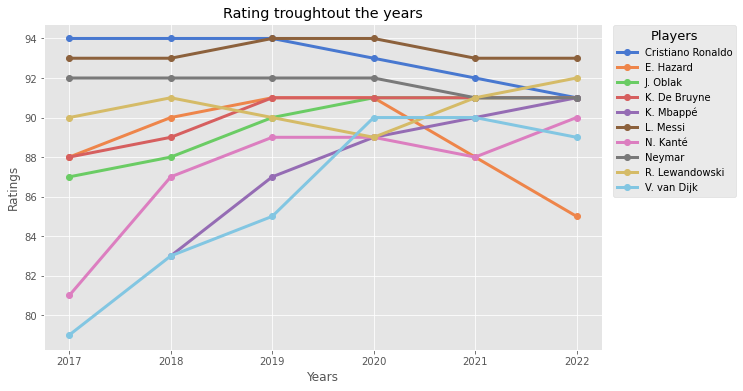

In [28]:
sns.set_palette('muted')
plt.figure(figsize=(10,6))
plt.plot(trend, 'o-', linewidth=3)
plt.xlabel('Years')
plt.ylabel('Ratings')
plt.title('Rating troughtout the years')
plt.legend(title='Players', title_fontsize = 13,bbox_to_anchor=(1.25,1.01),  labels=['Cristiano Ronaldo', 'E. Hazard', 'J. Oblak','K. De Bruyne','K. Mbappé','L. Messi','N. Kanté','Neymar','R. Lewandowski', 'V. van Dijk', ])
plt.show()

<h5> It seems Mbappe and van Dijk have had a meteoric rise but Eden Hazard has been on a decline since 2020. Other players like de Bruyne and Kante have also improved. But a lot of factors like injuries and age may also contribute to the decline and growth. So next we will try to analyze some promising players in their youth rather than the best of their eras.</h5>

In [29]:
df_fifa_22.loc[:20,['Name','Age','Overall','Potential','Growth','ValueEUR']]

,Name,Age,Overall,Potential,Growth,ValueEUR
0,L. Messi,34,93,93,0,78000000
1,R. Lewandowski,32,92,92,0,119500000
2,Cristiano Ronaldo,36,91,91,0,45000000
3,K. Mbappé,22,91,95,4,194000000
4,J. Oblak,28,91,93,2,112000000
5,K. De Bruyne,30,91,91,0,125500000
6,Neymar Jr,29,91,91,0,129000000
7,N. Kanté,30,90,90,0,100000000
8,H. Kane,27,90,90,0,129500000
9,M. ter Stegen,29,90,92,2,99000000


Seems like we have a few factors to help us identify the promising players. Growth and potential will be key. Also Growth is nothing but Potential-Overall rating to make our lives easier.

Since younger players have more years to reach their potential we will try filtering out the U-23 players.

In [30]:
df_u23=df_fifa_22[(df_fifa_22.Age<23)]

In [31]:
df_u23

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
17,230621,G. Donnarumma,Gianluigi Donnarumma,22,196,90,https://cdn.sofifa.com/players/230/621/22_60.png,Italy,89,93,...,38,40,38,34,37,34,34,34,34,90
26,239085,E. Haaland,Erling Haaland,20,194,94,https://cdn.sofifa.com/players/239/085/22_60.png,Norway,88,93,...,81,76,81,65,66,65,63,63,63,22
42,231281,T. Alexander-Arnold,Trent Alexander-Arnold,22,180,69,https://cdn.sofifa.com/players/231/281/22_60.png,England,87,92,...,85,87,85,87,86,87,86,81,86,22
46,233049,J. Sancho,Jadon Sancho,21,180,76,https://cdn.sofifa.com/players/233/049/22_60.png,England,87,91,...,88,82,88,69,65,69,63,51,63,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19254,255336,F. Emmings,Fred Emmings,17,195,95,https://cdn.sofifa.com/players/255/336/22_60.png,United States,48,73,...,20,22,20,19,23,19,18,22,18,49
19255,262759,S. Black,Stephen Black,19,180,75,https://cdn.sofifa.com/players/262/759/22_60.png,Republic of Ireland,48,62,...,36,35,36,44,43,44,47,50,47,15
19257,261985,Yang Haoyu,Haoyu Yang,20,183,77,https://cdn.sofifa.com/players/261/985/22_60.png,China PR,48,55,...,36,35,36,46,45,46,48,50,48,15
19258,261977,He Siwei,Siwei He,20,174,69,https://cdn.sofifa.com/players/261/977/22_60.png,China PR,48,58,...,38,37,38,46,45,46,49,50,49,17


There are 6524 Under 23 players. It is however difficult to find very promising players from such a large dataset. So we will try by looking at the players with a somewhat high potential in the mid 80 range of ratings. 

In [32]:
promising_u23=df_u23[df_u23.Potential>=84]

In [33]:
promising_u23

,ID,Name,FullName,Age,Height,Weight,PhotoUrl,Nationality,Overall,Potential,...,LMRating,CMRating,RMRating,LWBRating,CDMRating,RWBRating,LBRating,CBRating,RBRating,GKRating
3,231747,K. Mbappé,Kylian Mbappé,22,182,73,https://cdn.sofifa.com/players/231/747/22_60.png,France,91,95,...,92,84,92,70,66,70,66,57,66,21
17,230621,G. Donnarumma,Gianluigi Donnarumma,22,196,90,https://cdn.sofifa.com/players/230/621/22_60.png,Italy,89,93,...,38,40,38,34,37,34,34,34,34,90
26,239085,E. Haaland,Erling Haaland,20,194,94,https://cdn.sofifa.com/players/239/085/22_60.png,Norway,88,93,...,81,76,81,65,66,65,63,63,63,22
42,231281,T. Alexander-Arnold,Trent Alexander-Arnold,22,180,69,https://cdn.sofifa.com/players/231/281/22_60.png,England,87,92,...,85,87,85,87,86,87,86,81,86,22
46,233049,J. Sancho,Jadon Sancho,21,180,76,https://cdn.sofifa.com/players/233/049/22_60.png,England,87,91,...,88,82,88,69,65,69,63,51,63,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13582,263620,R. Lavia,Romeo Lavia,17,181,75,https://cdn.sofifa.com/players/263/620/22_60.png,Belgium,62,85,...,56,58,56,60,63,60,62,64,62,17
13719,260910,S. Shoretire,Shola Shoretire,17,175,70,https://cdn.sofifa.com/players/260/910/22_60.png,England,62,84,...,63,58,63,52,51,52,50,47,50,15
13721,260144,C. Patino,Charlie Patino,17,182,75,https://cdn.sofifa.com/players/260/144/22_60.png,England,62,85,...,61,64,61,63,65,63,63,63,63,17
15915,251187,P. Dwomoh,Pierre Dwomoh,17,185,69,https://cdn.sofifa.com/players/251/187/22_60.png,Belgium,60,85,...,62,58,62,53,52,53,51,48,51,17


A total of 243 players will be good enough for our analysis. However we need to get rid of some of the unnecessary columns.

In [34]:
promising_u23.columns

Index(['ID', 'Name', 'FullName', 'Age', 'Height', 'Weight', 'PhotoUrl',
       'Nationality', 'Overall', 'Potential', 'Growth', 'TotalStats',
       'BaseStats', 'Positions', 'BestPosition', 'Club', 'ValueEUR', 'WageEUR',
       'ReleaseClause', 'ClubPosition', 'ContractUntil', 'ClubNumber',
       'ClubJoined', 'OnLoad', 'NationalTeam', 'NationalPosition',
       'NationalNumber', 'PreferredFoot', 'IntReputation', 'WeakFoot',
       'SkillMoves', 'AttackingWorkRate', 'DefensiveWorkRate', 'PaceTotal',
       'ShootingTotal', 'PassingTotal', 'DribblingTotal', 'DefendingTotal',
       'PhysicalityTotal', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking',

In [35]:
promising_players= promising_u23[['Name','Age','Nationality','Overall','Potential','BestPosition','Club','ValueEUR','WageEUR','PaceTotal','ShootingTotal','PassingTotal','DribblingTotal','DefendingTotal','PhysicalityTotal','Reactions', 'GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes']]

In [36]:
promising_players.head()

,Name,Age,Nationality,Overall,Potential,BestPosition,Club,ValueEUR,WageEUR,PaceTotal,...,PassingTotal,DribblingTotal,DefendingTotal,PhysicalityTotal,Reactions,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
3,K. Mbappé,22,France,91,95,ST,Paris Saint-Germain,194000000,230000,97,...,80,92,36,77,93,13,5,7,11,6
17,G. Donnarumma,22,Italy,89,93,GK,Paris Saint-Germain,119500000,110000,91,...,79,90,53,85,85,91,83,79,85,90
26,E. Haaland,20,Norway,88,93,ST,Borussia Dortmund,137500000,110000,89,...,65,80,45,88,88,7,14,13,11,7
42,T. Alexander-Arnold,22,England,87,92,RB,Liverpool,114000000,150000,79,...,88,80,80,72,82,14,15,14,6,7
46,J. Sancho,21,England,87,91,CAM,Manchester United,116500000,150000,81,...,82,91,36,65,85,7,11,10,11,13


We need to be careful about the GK stats though because their stats have different calculations as we see here. However more of that later

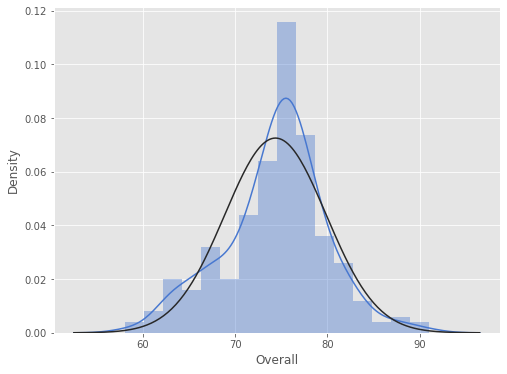

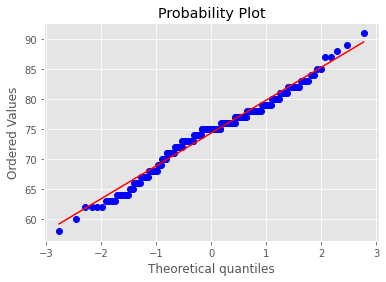

In [37]:
f, ax = plt.subplots(figsize=(8,6))
x = promising_players['Overall']
ax = sns.distplot(x, fit= norm)
plt.show()
ax = stats.probplot(x, plot=plt)
plt.show()

From the distribution plot and the probability plot, it seems the distribution is fairly Normal.To ensure we will check out the skewness and kurtosis.

In [38]:
print("Skewness: %f" % promising_players['Overall'].skew())
print("Kurtosis: %f" % promising_players['Overall'].kurt())

Skewness: -0.246500
Kurtosis: 0.448540


So the negative skew suggests a left skewed normal distribution and the kurtosis is within 1 so that's all good. Let's have a look at the Potential distribution. 

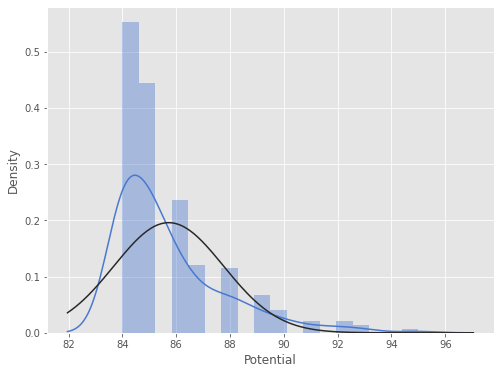

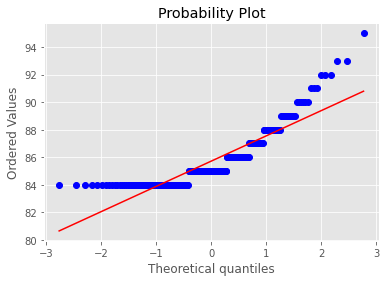

In [39]:
f, ax = plt.subplots(figsize=(8,6))
x = promising_players['Potential']
ax = sns.distplot(x, fit= norm)
plt.show()
ax = stats.probplot(x, plot=plt)
plt.show()

In [40]:
print("Skewness: %f" % promising_players['Potential'].skew())
print("Kurtosis: %f" % promising_players['Potential'].kurt())

Skewness: 1.652448
Kurtosis: 2.918980


It's evident that this is not fairly a normal distribution. However it is obvious since we have only selected the players with potential>=84. It also suggests very few players have the talent and ability to reach the top even if they are young and have years to practice. Does it mean practice doesn't make perfect? Haha

 <h4> Let us understand how the world values these players and how much the clubs value them financially</h4>


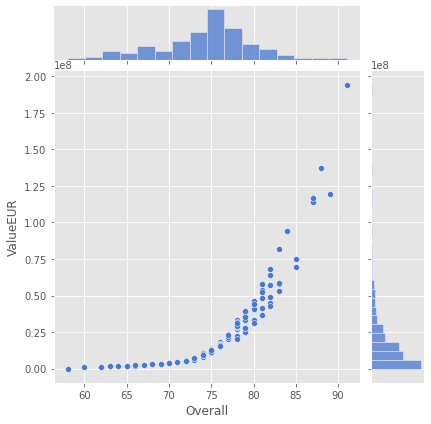

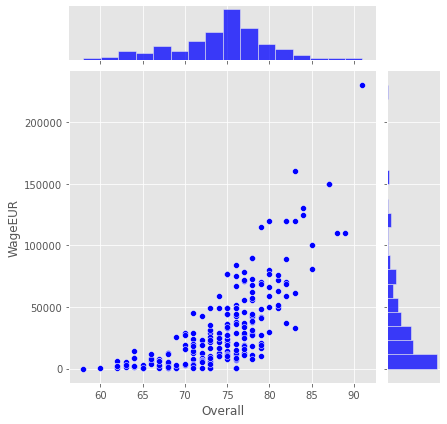

In [41]:
sns.jointplot(x='Overall',y='ValueEUR',data=promising_players)
sns.jointplot(x='Overall',y='WageEUR',color='b',data=promising_players)


The first thing that strikes is that some of the clubs might be spending a tad bit more than the actual values of the player. The wages are a lot spread out with the top earner definitely being the best. The same cannot be said however about some mid ratings. Also, the outlier that's clearly above everyone else seems to be happily at the top. You guessed it right, it is indeed <b>Mbappe ,a superstar in the making.

Let's have an insight into potential and overall with respect to nations, clubs as well as positions.

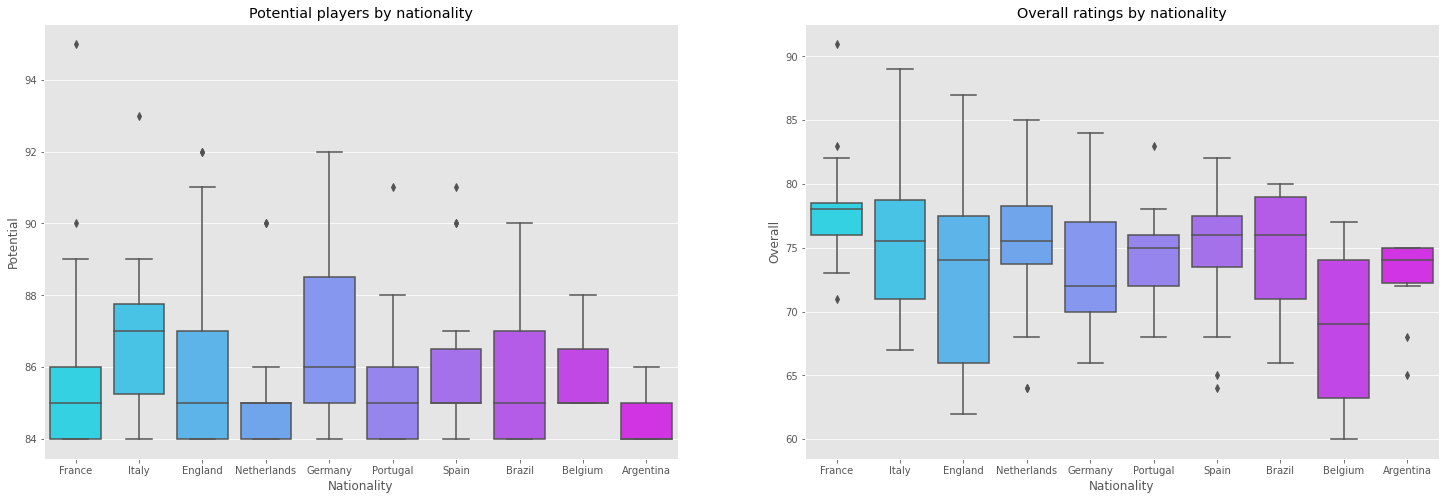

In [42]:
#wrt the top 10 players belonging in different nations
df_nation= promising_players.Nationality.value_counts()[:10].keys()
f, ax = plt.subplots(1, 2, figsize=(25, 8))
                     

sns.boxplot(x='Nationality', y='Potential',data = promising_players[promising_players.Nationality.isin(df_nation)], palette='cool',ax = ax[0]).set_title('Potential players by nationality');
sns.boxplot(x='Nationality', y='Overall',data = promising_players[promising_players.Nationality.isin(df_nation)], palette='cool',ax = ax[1]).set_title('Overall ratings by nationality');


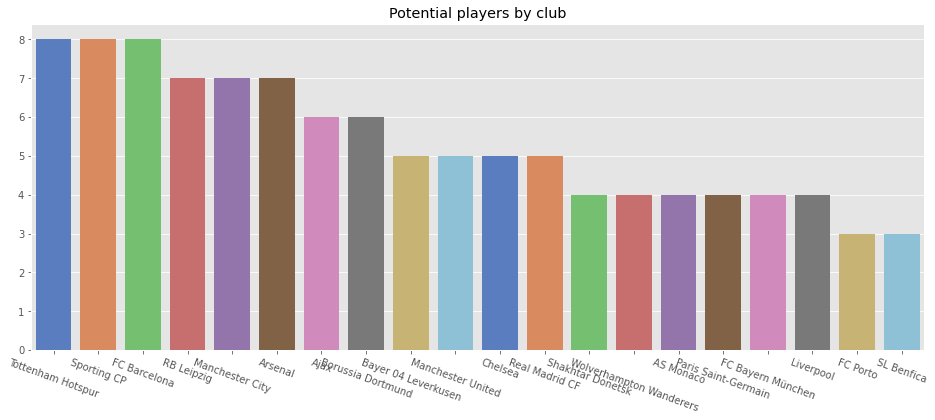

In [50]:
plt.figure(figsize=(16,6))
plt.xticks(rotation=340)
df_club= promising_players.Club.value_counts()[:20]

sns.barplot(x=df_club.index, y=df_club.values, palette='muted').set_title('Potential players by club');

Looks like England and Germany have a lot of high potential in the coming years whereas the other nations do have some young players who are much higher rated at the present in the present. As for clubs. Tottenham seems to be the having the highest number of u 23 players so better potential pool of talent for the future. Also it is evident England and Germany and Portugese clubs prefer a young squad as they are the clubs with most potential superstars in the top 20 clubs with talent.

In [54]:
from IPython.display import display, HTML
printing_cols =['Name', 'Age', 'Overall', 'Potential', 'BestPosition', 'ValueEUR']
for pos in promising_players.BestPosition.unique():
    print(f'Best {pos}')
    display(HTML(promising_players[promising_players.BestPosition == pos][printing_cols].head(10).to_html()))
    print('\n\n')

Best ST


,Name,Age,Overall,Potential,BestPosition,ValueEUR
3,K. Mbappé,22,91,95,ST,194000000
26,E. Haaland,20,88,93,ST,137500000
204,A. Isak,21,82,86,ST,45000000
412,D. Malen,22,80,85,ST,33000000
429,V. Osimhen,22,80,87,ST,43000000
661,M. Kean,21,79,87,ST,39500000
744,D. Vlahović,21,78,85,ST,29000000
761,J. David,21,78,86,ST,32000000
1087,P. Daka,22,77,84,ST,21500000
1394,A. Hložek,18,76,87,ST,16000000





Best GK


,Name,Age,Overall,Potential,BestPosition,ValueEUR
17,G. Donnarumma,22,89,93,GK,119500000
1068,I. Meslier,21,77,85,GK,20500000
2209,A. Lunin,22,74,85,GK,8000000
2984,Diogo Costa,21,73,85,GK,6500000
3764,L. Morales,21,72,85,GK,5000000
4183,M. Vandevoordt,19,71,87,GK,4300000
16929,C. Chatzigavriel,17,58,84,GK,0





Best RB


,Name,Age,Overall,Potential,BestPosition,ValueEUR
42,T. Alexander-Arnold,22,87,92,RB,114000000
89,A. Hakimi,22,85,88,RB,69500000
619,Emerson,22,79,84,RB,25000000
2644,D. Rensch,18,73,85,RB,7000000
2886,Dodô,22,73,84,RB,6500000





Best CAM


,Name,Age,Overall,Potential,BestPosition,ValueEUR
46,J. Sancho,21,87,91,CAM,116500000
102,P. Foden,21,84,92,CAM,94500000
117,K. Havertz,22,84,92,CAM,94500000
173,João Félix,21,83,91,CAM,82000000
177,M. Mount,22,83,89,CAM,58500000
205,Ferran Torres,21,82,90,CAM,68500000
229,M. Ødegaard,22,82,88,CAM,49000000
289,Pedri,18,81,91,CAM,54000000
608,Antony,21,79,88,CAM,39500000
636,Rodrygo,20,79,88,CAM,38500000





Best CB


,Name,Age,Overall,Potential,BestPosition,ValueEUR
88,M. de Ligt,21,85,90,CB,75000000
168,J. Koundé,22,83,89,CB,53000000
235,D. Upamecano,22,82,90,CB,64000000
292,E. Tapsoba,22,81,88,CB,48500000
442,A. Bastoni,22,80,89,CB,44500000
606,S. Botman,21,79,85,CB,25500000
634,M. Lacroix,21,79,86,CB,33000000
727,D. Zagadou,22,78,84,CB,20500000
730,I. Konaté,22,78,86,CB,29500000
749,W. Fofana,20,78,86,CB,29000000





Best CM


,Name,Age,Overall,Potential,BestPosition,ValueEUR
174,F. Valverde,22,83,89,CM,58000000
607,J. Bellingham,18,79,89,CM,37000000
653,A. Tchouaméni,21,79,85,CM,28000000
746,M. Caqueret,21,78,86,CM,30000000
748,E. Camavinga,18,78,89,CM,29500000
894,M. Guendouzi,22,77,84,CM,20000000
1085,S. Tonali,21,77,86,CM,22500000
1413,Matheus Nunes,22,76,85,CM,17000000
3271,B. Gilmour,20,72,86,CM,5500000
3397,M. Ugarte,20,72,84,CM,5500000





Best LB


,Name,Age,Overall,Potential,BestPosition,ValueEUR
198,A. Davies,20,82,89,LB,57000000
1449,Miranda,21,76,84,LB,16000000
1673,Álex Centelles,21,75,85,LB,12000000
6403,L. Netz,18,69,85,LB,3400000





Best RM


,Name,Age,Overall,Potential,BestPosition,ValueEUR
216,C. Pulisic,22,82,88,RM,49000000
441,Vinícius Jr.,20,80,90,RM,46500000
656,C. Gakpo,22,79,85,RM,28000000
1416,S. Dest,20,76,85,RM,15500000
1417,Gabriel Martinelli,20,76,88,RM,18000000
1421,M. Solomon,21,76,86,RM,17000000
1658,T. Chancalay,22,75,84,RM,12500000
1876,T. Chancalay,22,75,84,RM,12500000
1991,C. Tzolis,19,74,87,RM,10000000
2142,P. De la Vega,20,74,86,RM,10000000





Best CDM


,Name,Age,Overall,Potential,BestPosition,ValueEUR
282,D. Rice,22,82,87,CDM,43000000
444,B. Kamara,21,80,86,CDM,31000000
723,B. Soumaré,22,78,85,CDM,27000000
1503,O. Skipp,20,75,85,CDM,11500000
1621,Zubimendi,22,75,85,CDM,12500000
1671,O. Skipp,20,75,85,CDM,11500000
1925,Zubimendi,22,75,85,CDM,12500000
2845,Gustavo Assunção,21,73,85,CDM,7000000
2912,E. Fernández,20,73,84,CDM,6500000
7412,D. Ayala,18,68,84,CDM,2900000





Best LM


,Name,Age,Overall,Potential,BestPosition,ValueEUR
291,D. Kulusevski,21,81,89,LM,58000000
294,M. Diaby,21,81,88,LM,52500000
296,Cucurella,22,81,87,LM,41500000
432,B. Saka,19,80,88,LM,45500000
1054,S. Chukwueze,22,77,85,LM,23500000
1512,Rúben Vinagre,22,75,85,LM,12000000
1595,R. Sessegnon,21,75,84,LM,12000000
1634,R. Sessegnon,21,75,84,LM,12000000
1888,Rúben Vinagre,22,75,85,LM,12000000
3129,Marcos Paulo,20,72,84,LM,5500000





Best RWB


,Name,Age,Overall,Potential,BestPosition,ValueEUR
297,R. James,21,81,86,RWB,37000000
435,Pedro Porro,21,80,87,RWB,40500000
2233,T. Lamptey,20,74,84,RWB,9000000
2387,J. Bogle,20,74,85,RWB,9000000





Best LWB


,Name,Age,Overall,Potential,BestPosition,ValueEUR
651,O. Wijndal,21,79,84,LWB,25000000
750,Nuno Mendes,19,78,88,LWB,29000000
2694,R. Aït Nouri,20,73,84,LWB,6500000





Best LW


,Name,Age,Overall,Potential,BestPosition,ValueEUR
993,L. Sinisterra,22,77,84,LW,21500000
1415,Ansu Fati,18,76,90,LW,17500000
3776,K. Sulemana,19,72,84,LW,5500000





Best RW


,Name,Age,Overall,Potential,BestPosition,ValueEUR
3220,Y. Demir,18,72,85,RW,5500000


Representing the top 10 players in each position. Certain key insights are that a lot of high rated strikers are present along with a lot of CAM/CM/CDM and CB. However the LB RB and winger positions are a rare breed. Something to look at for the clubs for the future.


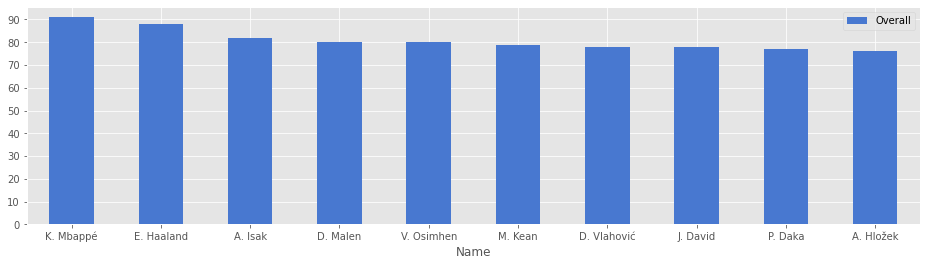



Best in ST


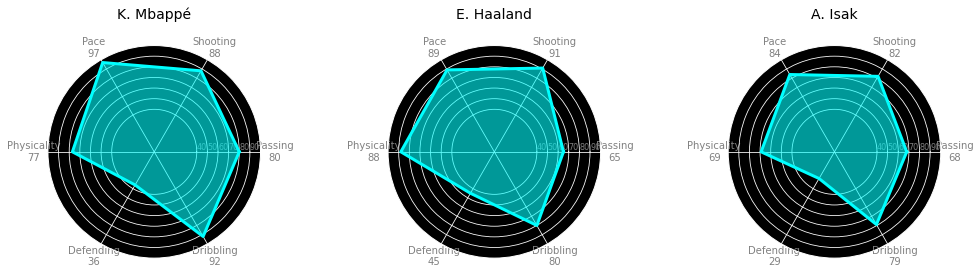

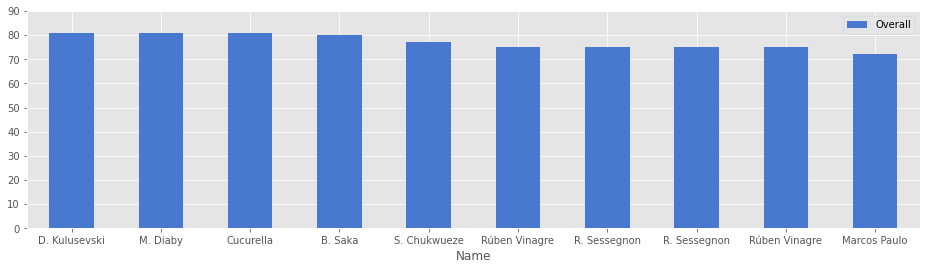



Best in LM


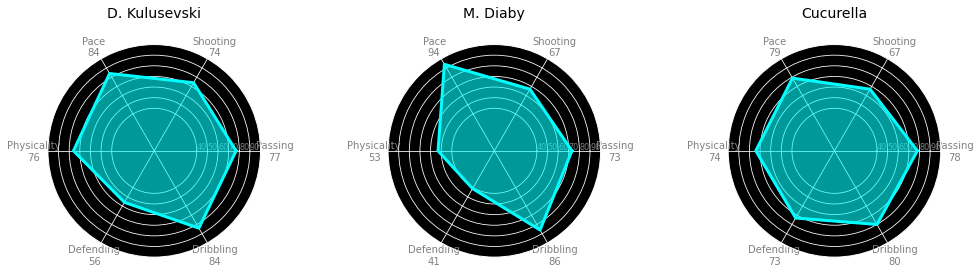

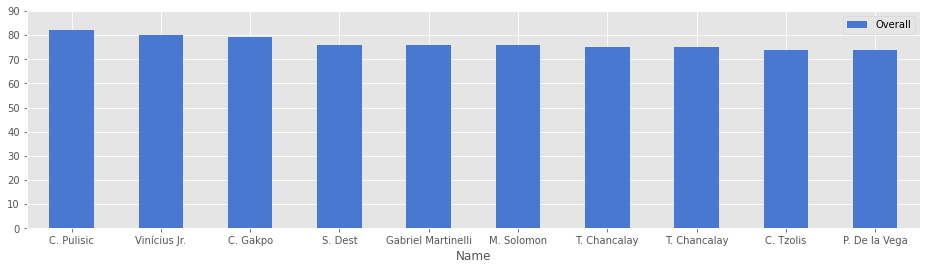



Best in RM


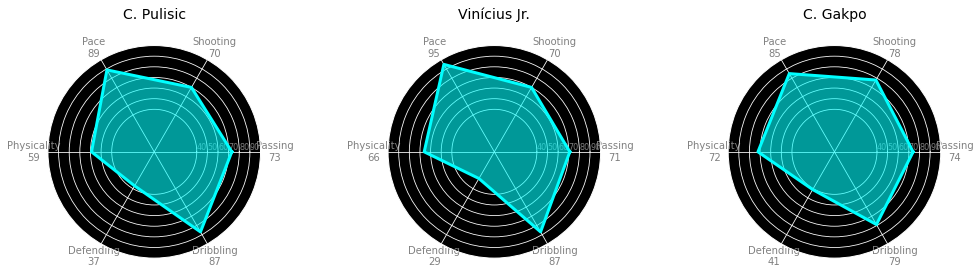

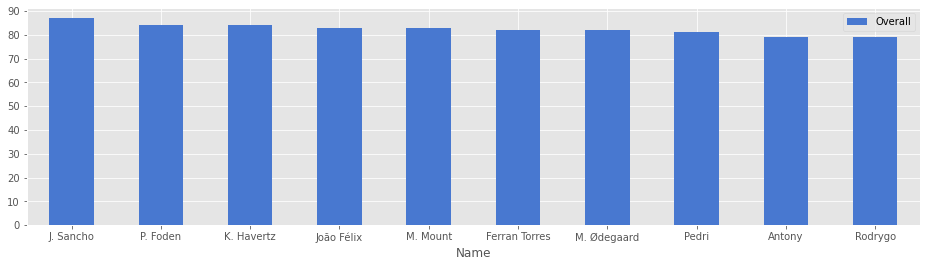



Best in CAM


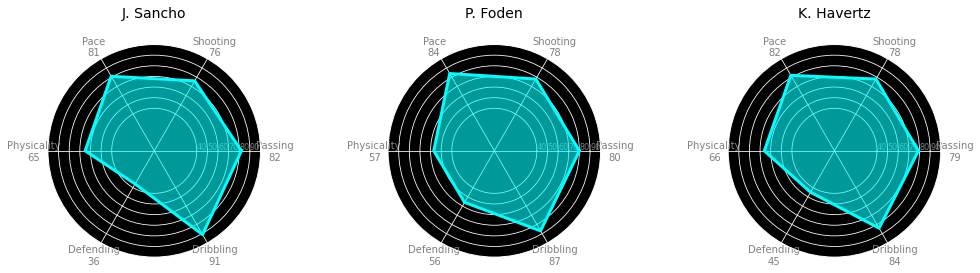

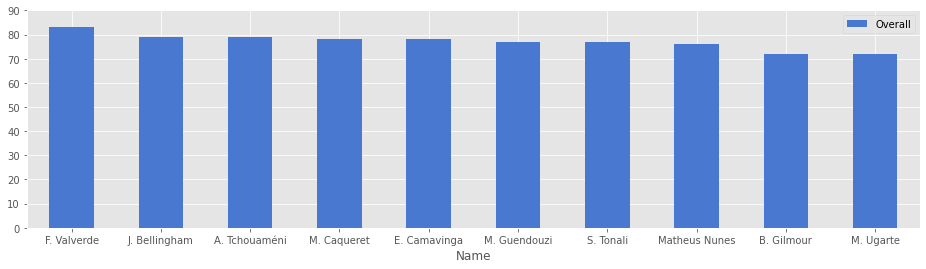



Best in CM


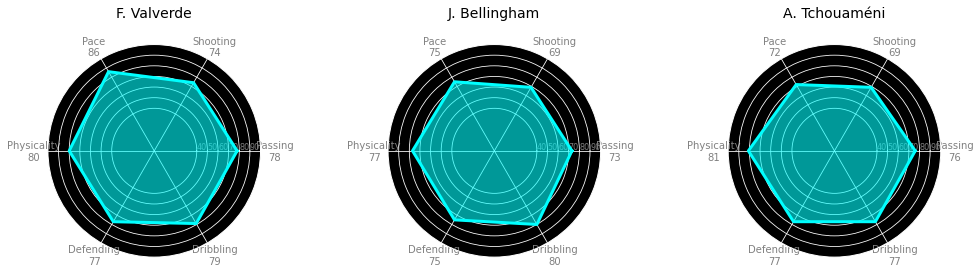

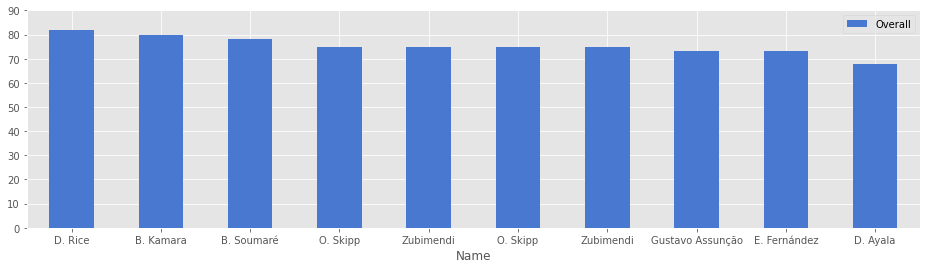



Best in CDM


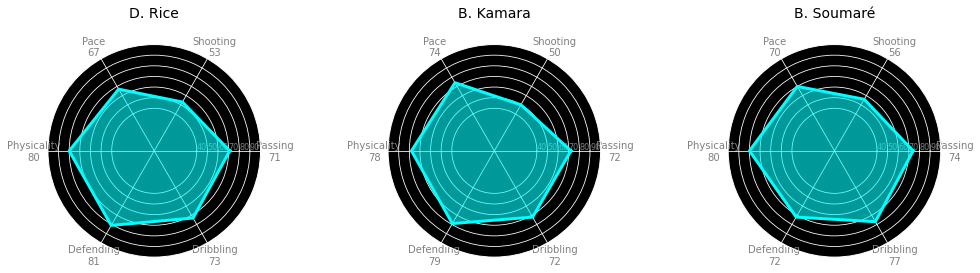

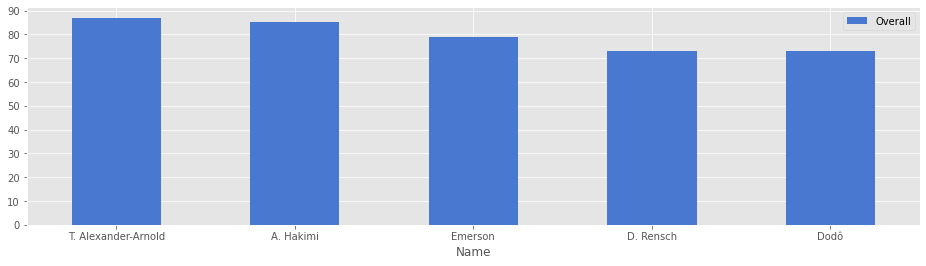



Best in RB


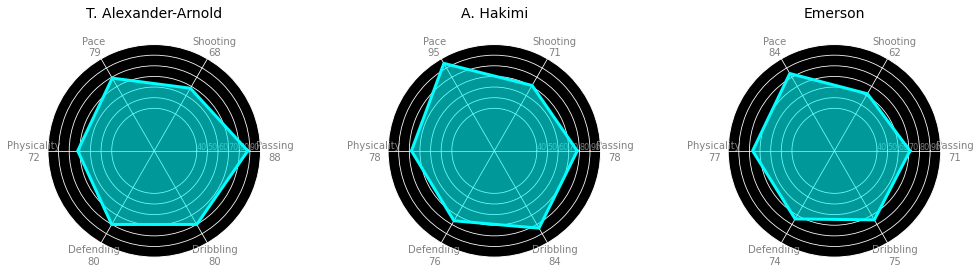

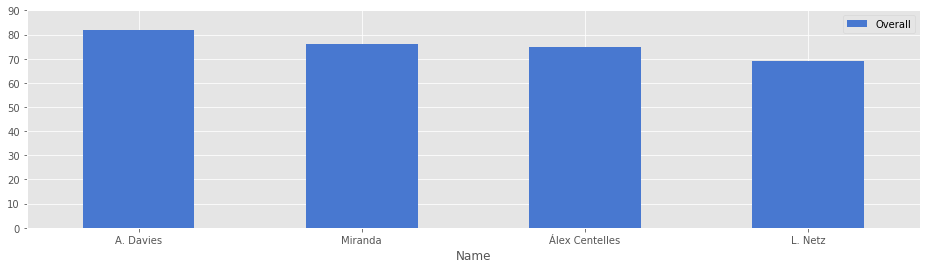



Best in LB


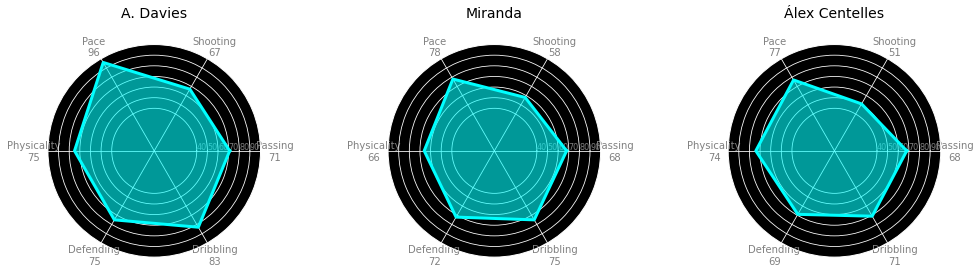

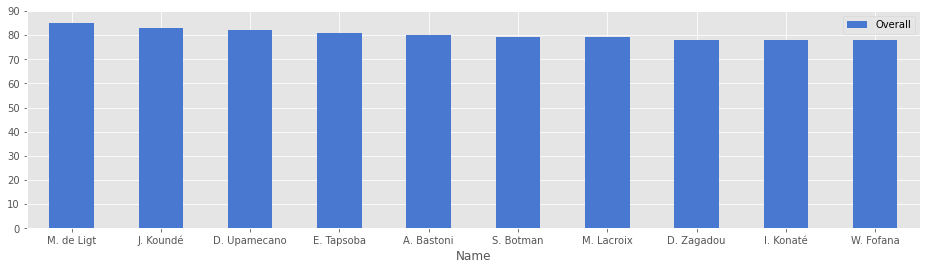



Best in CB


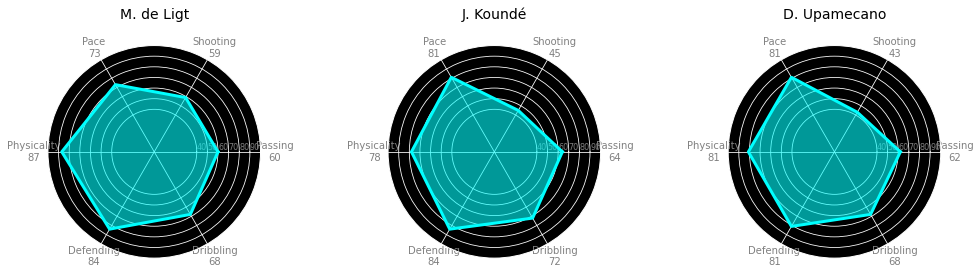

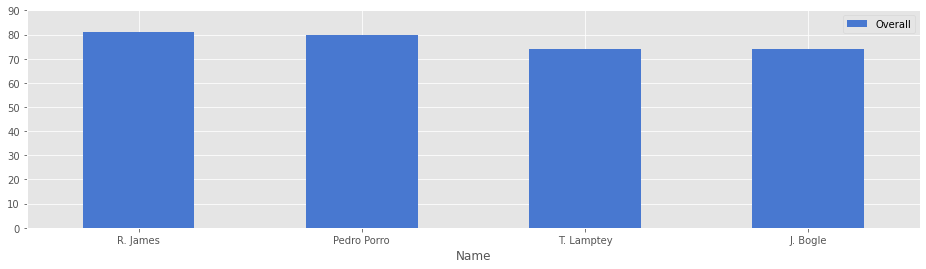



Best in RWB


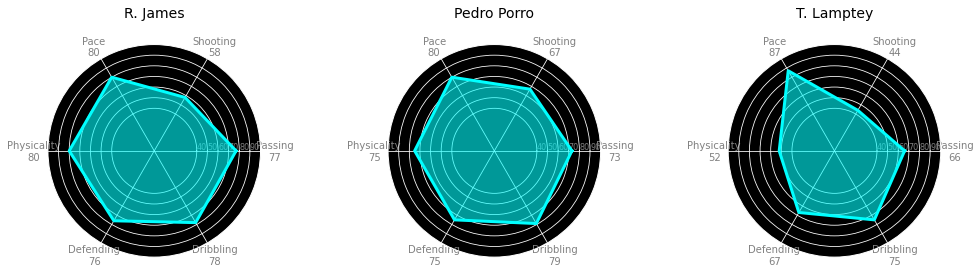

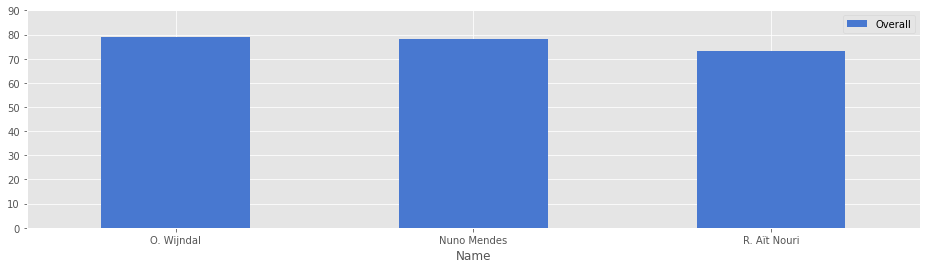



Best in LWB


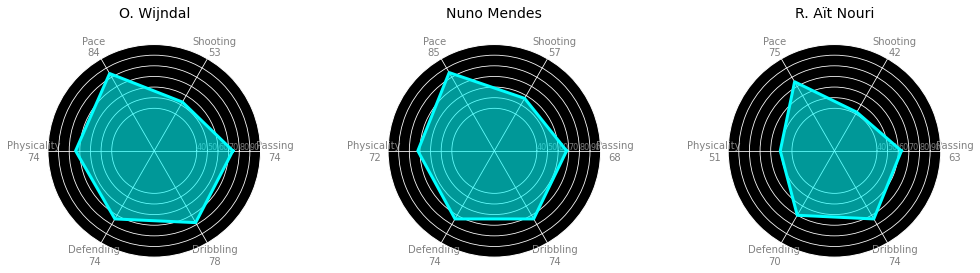

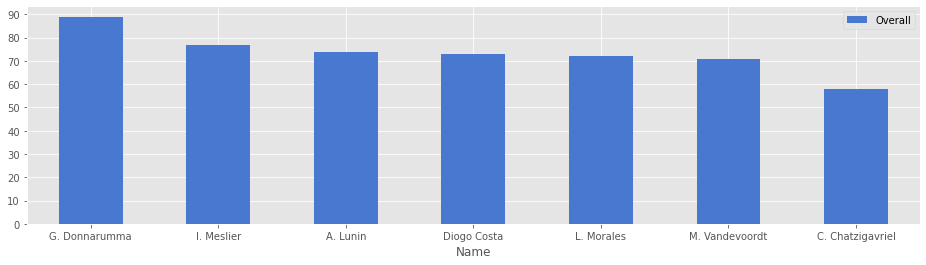



Best in GK


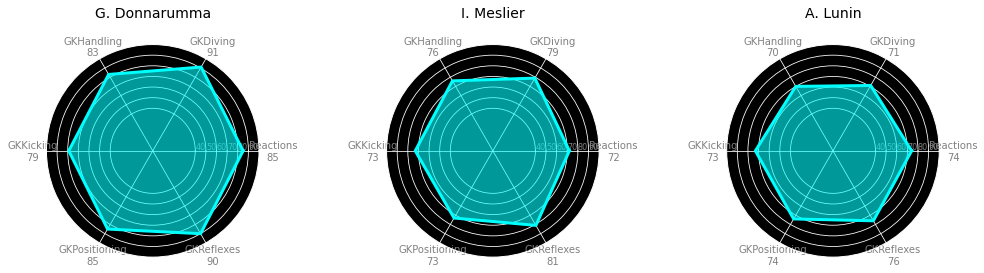

In [74]:
from math import pi

def make_spider(row, i):
    
    categories=['PassingTotal', 'ShootingTotal', 'PaceTotal', 
                'PhysicalityTotal',  'DefendingTotal', 'DribblingTotal']
    if row[1].BestPosition == "GK":
        categories=['Reactions', 'GKDiving', 'GKHandling', 
                    'GKKicking', 'GKPositioning', 'GKReflexes']
    N = len(categories)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    ax = plt.subplot(1, 3, i + 1, polar=True)
    plt.subplots_adjust(wspace=0.6)
    xticks_names =  [f"{cat.replace('Total', '')}\n{row[1][cat]}" for cat in categories]
    plt.xticks(angles[:-1], xticks_names, color='grey', size=10)
    
    ax.set_rlabel_position(0)
    ax.set_facecolor('xkcd:black')
    plt.yticks([40, 50, 60, 70, 80, 90], 
               ["40", "50", "60","70","80","90"], 
               color="grey", size=8)
    plt.ylim(0,100)
 

    values=row[1][categories].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color='cyan', linewidth=3, linestyle='solid')
    ax.fill(angles, values, color='cyan', alpha=0.6)
 
    plt.title(row[1].Name, size=14, color='black', y=1.1)
    
Positions = ['ST',  'LM', 'RM','CAM', 'CM', 'CDM', 'RB', 'LB', 'CB', 'RWB', 'LWB', 'GK']
bar_kwargs = dict(x='Name', y='Overall', figsize=(16,4), yticks=list(range(0, 100, 10)), rot=0)

for pos in Positions:
    promising_players[promising_players.BestPosition==pos][:10].plot.bar(**bar_kwargs);
    plt.show()
    plt.figure(figsize=(16,16))
    print(f'\n\nBest in {pos}')
    for i, row in enumerate(promising_players[promising_players.BestPosition==pos][:3].iterrows()):
        make_spider(row, i)
       